## Import Libraries

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Define Objective Function

In [150]:
# objective function
def f(x, y):
    return x**2 + y**2 + 1

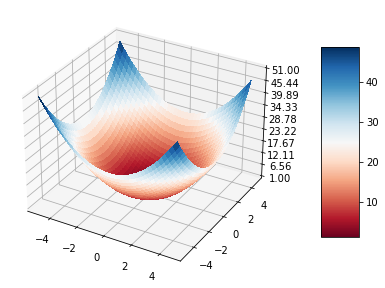

In [158]:
x = np.arange(-5, 5, .25)
# x = np.arange(-10, 10, 0.1)
y = np.arange(-5, 5, .25)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# visualize the objective function
fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [159]:
# visualization function
def contour_plot(x_seq, y_seq, init):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(init[0],init[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

## Gradient Descent

In [160]:
# partial derivative
def dfdx(x, y):
    return 2 * x

def dfdy(x, y):
    return 2 * y

def derivative(x, y):
    return np.array([dfdx(x, y), dfdy(x, y)])

# gradient algorithm
def gradient_descent(df, x_prev, lr):
    
    # threshold
    eps = 0.0001

    iter = 1
    seq_x = []
    seq_y = []

    # initial step
    x_next = x_prev - lr * df(x_prev[0], x_prev[1])

    # record step coordinate x and y
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])

    # iterate until reach threshold
    while np.linalg.norm(x_next - x_prev) > eps:
        
        # update previos points
        x_prev = x_next

        # generate next points
        x_next = x_prev - lr * df(x_prev[0], x_prev[1])
        iter += 1

        # record every step coordinate x and y
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

    return (x_next, iter, seq_x, seq_y)

Minimum (x, y) from gradient descent: [1.31621704e-04 4.38739013e-05]
Number of gradient descent iteration: 21


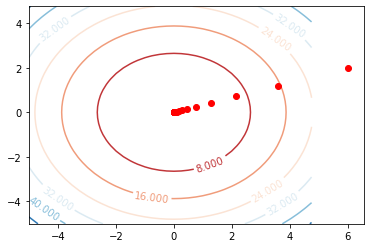

In [161]:
# define initial point
init = np.array([6, 2])
gd = gradient_descent(derivative, init, .2)

print(f'Minimum (x, y) from gradient descent: {gd[0]}')
print(f'Number of gradient descent iteration: {gd[1]}')

# visualize the optimization step
contour_plot(gd[2], gd[3], init)

## Gradient Descent with Momentum

In [162]:
def gradient_descent_momentum(df, x_init, lr, beta=0.9):
    
    # threshold
    eps = 0.0001

    iter = 1
    seq_x = []
    seq_y = []

    # initial step
    moment = (1 - beta) * df(x_init[0], x_init[1])

    # update initial step
    x_next = x_init - lr * moment

    # record step coordinate x and y
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])

    # iterate until reach threshold
    while np.linalg.norm(x_next - x_init) > eps:

        # update previous points
        x_init = x_next

        # calculate next moment
        moment = (beta * moment) + ((1 - beta) * df(x_init[0], x_init[1]))

        # generate next point
        x_next = x_init - lr * moment

        iter += 1

        # record every step coordinate x and y
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

    return (x_next, iter, seq_x, seq_y)


Minimum (x, y) from gradient descent w/ moment: [-0.09342981 -0.03114327]
Number of gradient descent w/ moment iteration: 79


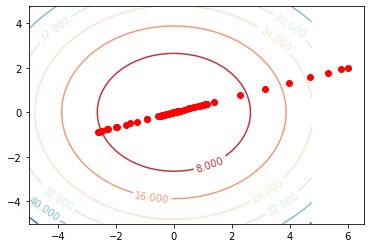

In [163]:
gdm = gradient_descent_momentum(derivative, init, .2)

print(f'Minimum (x, y) from gradient descent w/ moment: {gdm[0]}')
print(f'Number of gradient descent w/ moment iteration: {gdm[1]}')

contour_plot(gdm[2], gdm[3], init)

## RMSprop

In [187]:
def RMSprop(df, x_init, lr, beta=0.9, constant=1e-6):
    
    # threshold
    eps = 0.0001

    iter = 1
    seq_x = []
    seq_y = []

    # initial step
    gradient = df(x_init[0], x_init[1])    
    moment = (1 - beta) * (gradient ** 2)    

    # update initial step
    x_next = x_init - lr * gradient / (np.sqrt(moment) + constant)    

    # record step coordinate x and y
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
        
    # iterate until reach threshold
    while np.linalg.norm(x_next - x_init) > eps:    

        # update previous points
        x_init = x_next

        # calculate next moment
        gradient = df(x_init[0], x_init[1])
        moment = (beta * moment) + ((1 - beta) * (gradient ** 2))

        # generate next point
        x_next = x_init - lr * gradient / (np.sqrt(moment) + constant)

        iter += 1

        # record every step coordinate x and y
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])        

    return (x_next, iter, seq_x, seq_y)

Minimum number (x, y) from RMSprop: [7.00802188e-05 8.78653214e-15]
Number of RMSprop iteration: 58


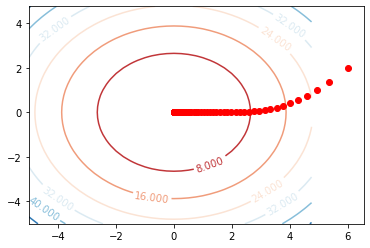

In [188]:
rmsprop = RMSprop(derivative, init, .2)

print(f'Minimum number (x, y) from RMSprop: {rmsprop[0]}')
print(f'Number of RMSprop iteration: {rmsprop[1]}')

contour_plot(rmsprop[2], rmsprop[3], init)

## Adam

In [189]:
def Adam(df, x_init, lr, beta1=0.9, beta2=0.999, constant=1e-8):

    # threshold
    eps = 0.0001

    iter = 1
    seq_x = []
    seq_y = []

    # initial step
    gradient = df(x_init[0], x_init[1])
    moment = beta1 * 0 + (1 - beta1) * gradient
    rmsprop = beta2 * 0 + (1 - beta2) * (gradient ** 2)

    # corrected moment and rmsprop
    moment_corr = moment / (1 - beta1 ** iter)
    rmsprop_corr = rmsprop / (1 - beta2 ** iter)

    # update initial step
    x_next = x_init - lr * moment_corr / (np.sqrt(rmsprop_corr) + constant)

    # record step coordinate x and y
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])

    # iterate until reach threshold
    while np.linalg.norm(x_next - x_init) > eps:
        
        iter += 1

        # update previous points
        x_init = x_next

        # calculate next moment and rmsprop
        gradient = df(x_init[0], x_init[1])
        moment = (beta1 * moment) + ((1 - beta1) * gradient)
        rmsprop = (beta2 * rmsprop) + ((1 - beta2) * gradient ** 2)

        # corrected moment and rmsprop
        moment_corr = moment / (1 - beta1 ** iter)
        rmsprop_corr = rmsprop / (1 - beta2 ** iter)

        # generate next point
        x_next = x_init - lr * moment_corr / (np.sqrt(rmsprop_corr) + constant)

        # record eery step coordinate x and y
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

    
    return (x_next, iter, seq_x, seq_y)

Minimum number (x, y) from Adam: [0.00172869 0.00046998]
Number of Adam iteration: 156


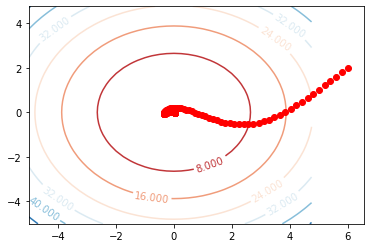

In [190]:
adam = Adam(derivative, init, .2)

print(f'Minimum number (x, y) from Adam: {adam[0]}')
print(f'Number of Adam iteration: {adam[1]}')

contour_plot(adam[2], adam[3], init)

## Finding an Extremum Illustration

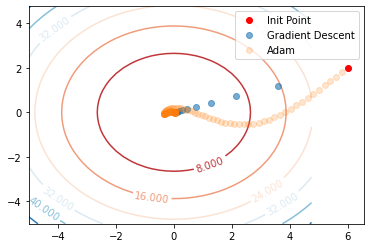

In [193]:
plt.figure(1)
CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(CS, inline=1, fontsize=10)
# initial point
plt.plot(init[0], init[1], 'ro', label='Init Point')

# gradient descent algorithm
plt.plot(gd[2], gd[3], 'o', label='Gradient Descent', alpha=0.6)

# gradient descent moment
# plt.plot(gdm[2], gdm[3], 'o', label='Momentum', alpha=0.4)

# RMSprop
# plt.plot(rmsprop[2], rmsprop[3], 'o', label='RMSprop', alpha=0.4)

# Adam
plt.plot(adam[2], adam[3], 'o', label='Adam', alpha=0.2)
plt.legend()
plt.show()